# Normalization (Online transaction processing OLTP db)

Get relationship;
https://www.youtube.com/watch?v=Ipr9ws2bPEU

Cant have many to many... 
Need bridge table {} to resolve with two 1-to-many

In [ ]:
Optimize for data capture:
    1) eliminate redundancy of data (save space)
    2) ensure data is updated only in one place

Naming Standards:
1)     Singular noun as table name -> ex: Product
2)     To avoid reserve words append table to names -> Product Date
3)     Avoid space in column names
4)     only use alphanumerical
5)     start table and column name with letter

1 Normal Form:
    1) each column is one value {last name and first name are two columns}
    2) Remove all repeating group {author1 and author2}
    3) Value are same type in column
    4) column name is unique
    5) No two rows are identical
    
2 Normal Form: all above plus
    6) All non-key attribute are dependent on the primary key <all single column PK are 2NF>
    
3 Normal Form: all above plus
    7) Contains no transitive dependency

Screen Shot 2021-03-08 at 12.39.50 AM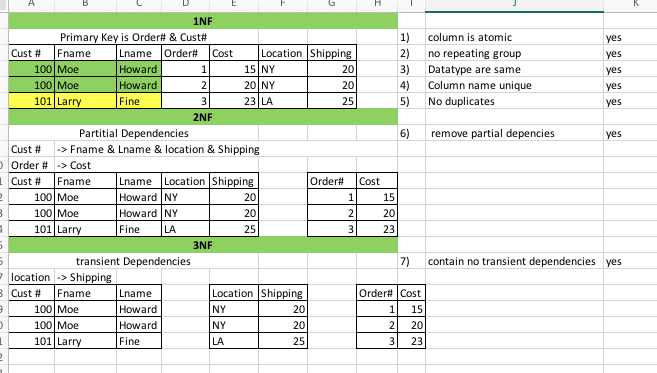

Screen Shot 2021-03-08 at 12.51.56 AM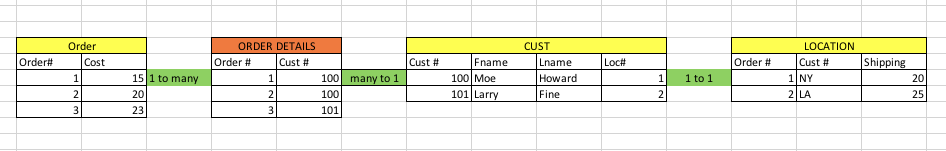

# Denormalizing (analytic data warehouse) usually with star Schema

Optimize for data access: performance is about retrieving data quickly. jobs are usually batch so write speed isn't top priority.
    1) allow data redundancy 
    2) reduce joins (Product type + Product material table + Product spec table) -> business logic -> Product dimension

star schema
> Dimension 
> Facts


Screen Shot 2021-03-08 at 12.55.56 AM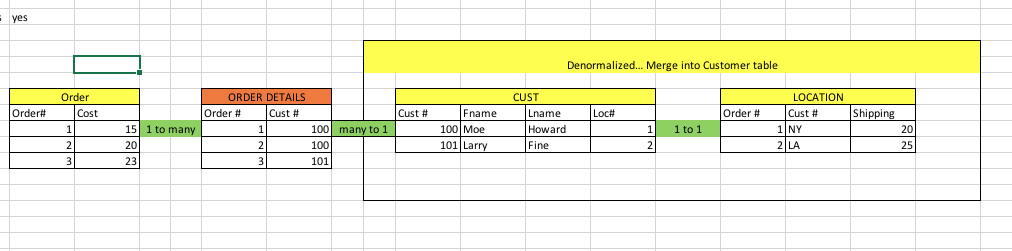

### Fact Table
A fact table is a primary table in dimension modelling.

A Fact Table contains:
Measurements/facts
Foreign key to dimension table

### Dimension Table
>A dimension table contains dimensions of a fact.
>They are joined to fact table via a foreign key.
>Dimension tables are de-normalized tables.
>The Dimension Attributes are the various columns in a dimension table
>Dimensions offers descriptive characteristics of the facts with the help of their attributes
>No set limit set for given for number of dimensions
>The dimension can also contain one or more hierarchical relationships

1) Demensions related directly to the fact table
2) dimension are denormalized.
3) Usually the dimension keys are NOT keys from the source system, rather they are surrogate keys
4) Dimension attribute you define the granularity called the grain of the fact

### multi Dimension - pre-calculated aggregates accross multiple dimension

### Steps of Dimensional Modelling
The accuracy in creating your Dimensional modeling determines the success of your data warehouse implementation. Here are the steps to create Dimension Model

1)Identify Business Process
2)Identify Grain (level of detail)
3)Identify Dimensions
4)Identify Facts
5)Build Star Schema

Screen Shot 2021-03-08 at 1.27.10 AM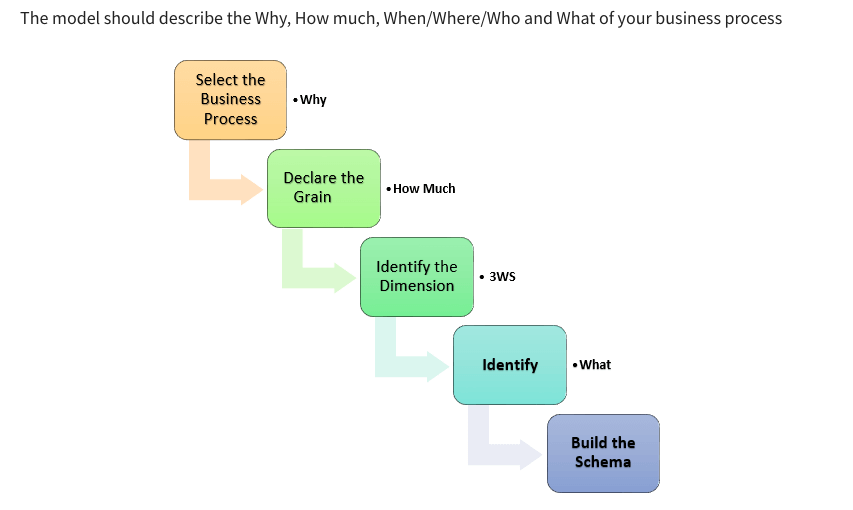

### Step 1) Identify the Business Process
Identifying the actual business process a datarehouse should cover. This could be Marketing, Sales, HR, etc. as per the data analysis needs of the organization. The selection of the Business process also depends on the quality of data available for that process. It is the most important step of the Data Modelling process, and a failure here would have cascading and irreparable defects.

To describe the business process, you can use plain text or use basic Business Process Modelling Notation (BPMN) or Unified Modelling Language (UML).

### Step 2) Identify the Grain
The Grain describes the level of detail for the business problem/solution. It is the process of identifying the lowest level of information for any table in your data warehouse. If a table contains sales data for every day, then it should be daily granularity. If a table contains total sales data for each month, then it has monthly granularity.

During this stage, you answer questions like

1. Do we need to store all the available products or just a few types of products? This decision is based on the business processes selected for Datawarehouse
2. Do we store the product sale information on a monthly, weekly, daily or hourly basis? This decision depends on the nature of reports requested by executives
3. How do the above two choices affect the database size?

Example of Grain:
The CEO at an MNC wants to find the sales for specific products in different locations on a daily basis.

So, the grain is "product sale information by location by the day."

### Step 3) Identify the Dimensions
Dimensions are nouns like date, store, inventory, etc. These dimensions are where all the data should be stored. For example, the date dimension may contain data like a year, month and weekday.

Example of Dimensions:

The CEO at an MNC wants to find the sales for specific products in different locations on a daily basis.

Dimensions: Product, Location and Time

Attributes: For Product: Product key (Foreign Key), Name, Type, Specifications

Hierarchies: For Location: Country, State, City, Street Address, Name

### Step 4) Identify the Fact
This step is co-associated with the business users of the system because this is where they get access to data stored in the data warehouse. Most of the fact table rows are numerical values like price or cost per unit, etc.

Example of Facts:

The CEO at an MNC wants to find the sales for specific products in different locations on a daily basis.

The fact here is Sum of Sales by product by location by time.

### Step 5) Build Schema
In this step, you implement the Dimension Model. A schema is nothing but the database structure (arrangement of tables). There are two popular schemas

#### Star Schema
The star schema architecture is easy to design. It is called a star schema because diagram resembles a star, with points radiating from a center. The center of the star consists of the fact table, and the points of the star is dimension tables.

The fact tables in a star schema which is third normal form whereas dimensional tables are de-normalized.

#### Snowflake Schema
The snowflake schema is an extension of the star schema. In a snowflake schema, each dimension are normalized and connected to more dimension tables.

### Rules for Dimensional Modelling
Following are the rules and principles of Dimensional Modeling:

        >Load atomic data into dimensional structures.
        >Build dimensional models around business processes.
        >Need to ensure that every fact table has an associated date dimension table.
        >Ensure that all facts in a single fact table are at the same grain or level of detail.
        >It's essential to store report labels and filter domain values in dimension tables
        >Need to ensure that dimension tables use a surrogate key
        >Continuously balance requirements and realities to deliver business solution to support their decision-making


### Benefits of Dimensional Modeling
Standardization of dimensions allows easy reporting across areas of the business.
Dimension tables store the history of the dimensional information.
It allows to introduce entirely new dimension without major disruptions to the fact table.
Dimensional also to store data in such a fashion that it is easier to retrieve the information from the data once the data is stored in the database.
Compared to the normalized model dimensional table are easier to understand.
Information is grouped into clear and simple business categories.
The dimensional model is very understandable by the business. This model is based on business terms, so that the business knows what each fact, dimension, or attribute means.
Dimensional models are deformalized and optimized for fast data querying. Many relational database platforms recognize this model and optimize query execution plans to aid in performance.
Dimensional modelling in data warehouse creates a schema which is optimized for high performance. It means fewer joins and helps with minimized data redundancy.
The dimensional model also helps to boost query performance. It is more denormalized therefore it is optimized for querying.
Dimensional models can comfortably accommodate change. Dimension tables can have more columns added to them without affecting existing business intelligence applications using these tables.

### What is Multi-Dimensional Data Model in Data Warehouse?
Multidimensional data model in data warehouse is a model which represents data in the form of data cubes. It allows to model and view the data in multiple dimensions and it is defined by dimensions and facts. Multidimensional data model is generally categorized around a central theme and represented by a fact table.

### Slowly changing Dimension- Type 1:
simply overwrite the existing dimension with the new information
pro - easy to implement. con: lost ability to see how data looked previously 

### Slowly changing Dimension- Type 2:
Keep all historical values in dimension
pro - better ability to report accurately historically con: hard

### Slowly changing Dimension- Type 3:
Keep only prior and new values
pro - some hist reporting and easier to implement con -  

### Functional Data Engineering

#### Pure tasks (insert overwrite)
A pure task should be deterministic and idempotent, meaning that it will produce the same result every time it runs or re-runs. This requires forcing an overwrite approach, meaning re-executing a pure task with the same input parameters should overwrite any previous output that could have been left out from a previous run of the same task.

*  1) Table partitions as immutable objects
*  2) dimension snapshots for slowly changing dimension

### Late arriving Fact - 4 week delta load.